In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import sympy

In [2]:
df = pd.read_csv("coil_position_data.txt")
df.columns=['w_t','LV']
df.head()

,w_t,LV
0,0.000000,3.000000
1,2.170418,3.023155
2,3.183280,3.037627
3,4.340836,3.049204
4,6.221865,3.057887


In [5]:
w_t = sympy.symbols('w_t')
LV_vs_w_t = sympy.interpolating_spline( 3 , w_t , df['w_t'] , df['LV'])

In [6]:
w_t_vector = np.linspace(0,max(df['w_t']),int(170))
LV = sympy.lambdify(w_t, LV_vs_w_t, "numpy") 
LV_vector = LV(w_t_vector)

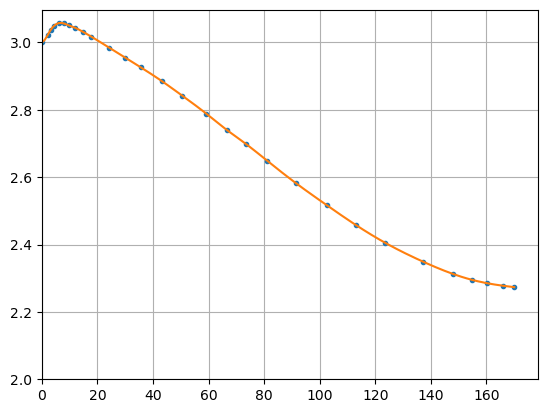

In [7]:
plt.plot(df['w_t'],df['LV'],'.')
plt.plot(w_t_vector,LV_vector)
plt.grid()
plt.ylim(bottom=2)
plt.xlim(left=0)
plt.show()

In [ ]:
#sympy.integrate( 1/LV_vs_w_t , (w_t , 0 , 170))

In [18]:
w_t_vector[-1]

170.016077170418

In [15]:
inv_LV = sympy.lambdify(w_t, 1/LV_vs_w_t, "numpy") 
from scipy.integrate import quad
shock_travel_quad = quad( inv_LV , 0 , 170)
shock_travel_quad

(65.0033098438921, 9.490469769338376e-07)

In [16]:
inv_LV_vector = inv_LV(w_t_vector)
from scipy.integrate import simpson
shock_travel_simpson = simpson(inv_LV_vector )
shock_travel_simpson


64.62184743887306